In [9]:
#perform neighbor enrichment analysis with squidpy
import anndata
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import time, os, sys
import glob
import warnings
import numpy as np
import seaborn as sns
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#import simualted data
path_to_csv = './../../../SCNA_thesis/data/20250217_asym01_nbh2_1000dim_grid200_300iter_50swaps/'
csv_files = glob.glob(os.path.join(path_to_csv, '*.csv'))

In [16]:
# Initialize an empty list to store individual DataFrames
data_frames = []

# Loop through the CSV files and process each one
for file in csv_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    sample_id = os.path.splitext(os.path.basename(file))[0]
    df['sample_id'] = sample_id
    data_frames.append(df)

# Concatenate all DataFrames into one big DataFrame
obs = pd.concat(data_frames, ignore_index=True)

# add marker files to it, as SpatialLDA needs them
obs['D'] = np.random.randint(1, 101, size=len(obs))
obs['E'] = np.random.randint(1, 101, size=len(obs))
obs = obs.astype({'ct':'string'})

# the data matrix 
X = obs[['D', 'E']]
X = X.values
adata = anndata.AnnData(X)
adata.obs = obs

adata.obs

,x,y,ct,sample_id,D,E
0,0.000000,0.000000,3.0,cross01_0.45_ab0_0.15_44,67,19
1,26.092384,0.000000,0.0,cross01_0.45_ab0_0.15_44,58,60
2,50.183110,0.000000,3.0,cross01_0.45_ab0_0.15_44,22,69
3,77.284590,0.000000,3.0,cross01_0.45_ab0_0.15_44,2,14
4,101.850801,0.000000,2.0,cross01_0.45_ab0_0.15_44,27,55
...,...,...,...,...,...,...
4283227,961.254256,784.658135,0.0,cross01_0.45_ab0_0.1_17,9,96
4283228,348.721290,306.527478,2.0,cross01_0.45_ab0_0.1_17,93,89
4283229,392.800743,313.550889,1.0,cross01_0.45_ab0_0.1_17,85,99
4283230,474.066686,92.531446,1.0,cross01_0.45_ab0_0.1_17,70,62


In [17]:
# save files for ct abundance comparison
abundances = adata.obs.groupby(['sample_id', 'ct']).size().reset_index(name='abundance')
heatmap_data = abundances.pivot(index='sample_id', columns='ct', values='abundance').fillna(0)
# save heatmap data
heatmap_data.to_csv('./../Comparison/20250218_results_asym/ct_abundances_4ct_cross01.csv')

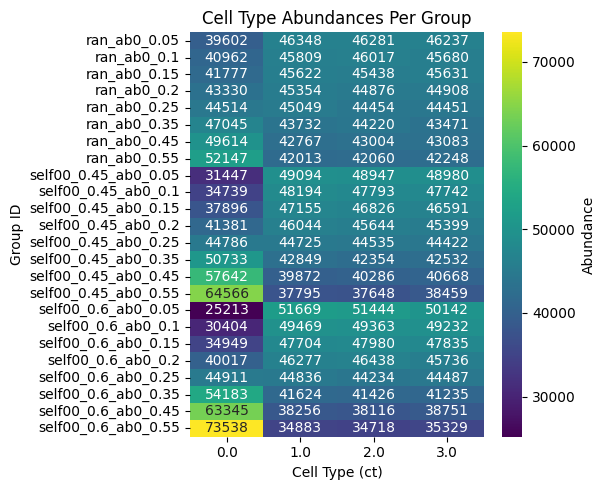

In [6]:
#plot the cell type distribution split by samples

# Extract the common part of the `sample_id` before the last underscore and group samples
adata.obs['group_id'] = adata.obs['sample_id'].str.replace(r'_[^_]+$', '', regex=True)

# Count occurrences of each cell type per group_id
abundances = adata.obs.groupby(['group_id', 'ct']).size().reset_index(name='abundance')

# Pivot the table to create a heatmap-friendly format
heatmap_data = abundances.pivot(index='group_id', columns='ct', values='abundance').fillna(0)

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis", cbar_kws={'label': 'Abundance'})
plt.title("Cell Type Abundances Per Group")
plt.xlabel("Cell Type (ct)")
plt.ylabel("Group ID")
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig("./../../Paper_figures/dirSEA_v2/cell_type_abundances_symmetric_simulation.svg", format="svg")

plt.show()

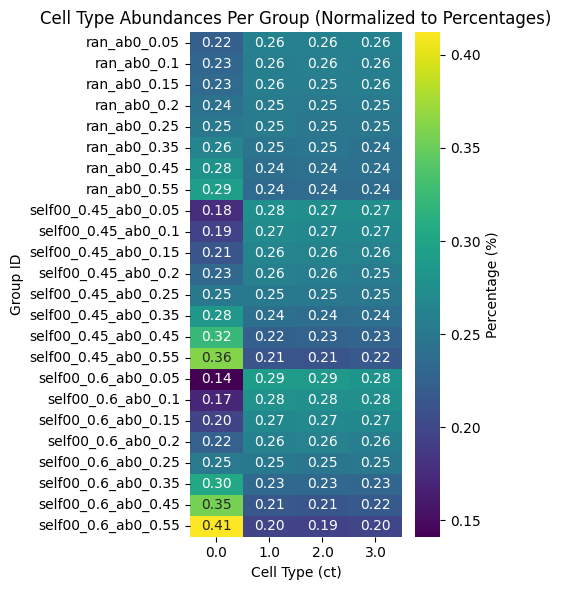

In [7]:
# normalized ct abundance heatmap
heatmap_data_normalized = heatmap_data.div(heatmap_data.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(5, 6))
sns.heatmap(
    heatmap_data_normalized, 
    annot=True, 
    fmt=".2f",  # Show one decimal place
    cmap="viridis", 
    cbar_kws={'label': 'Percentage (%)'}
)
plt.title("Cell Type Abundances Per Group (Normalized to Percentages)")
plt.xlabel("Cell Type (ct)")
plt.ylabel("Group ID")
plt.tight_layout()

# Save the figure as an SVG file
plt.savefig("./../../Paper_figures/dirSEA_v2/cell_type_abundances_symmetric_percentage_simulation.svg", format="svg")

# Show the plot
plt.show()#